# Customer Personality Analysis.

# Latar Belakang
Sebuah perusahaan memiliki data customer berdasarkan income, tahun lahir, tingkat pendidikan, dan lainnya. Dari data tersebut diharapkan perusahaan dapat memperoleh data customer yang selama ini telah memiliki transaksi di store perusahaan tersebut.
Pengelompokkan customer dapat dilakukan untuk melihat rentang usia, rentang pendidikan, maupun status dari seorang customer. 

# Perumusan Masalah
Perusahaan berusaha untuk mengetahui keputusan apa yang diambil oleh seorang customer untuk berbelanja di store mereka. Informasi yang diperoleh diharapkan dapat membantu store untuk mengetahui apakah faktor income dapat menjadi faktor daya beli seorang customer.

Sebagai data analis, maka kami akan mencoba menjawab pertanyaan berikut:

**1. Apakah penghasilan seorang customer menjadi faktor utama dengan daya beli?**

**2. Apakah terdapat kelompok tertentu yang dapat menjadi tolak ukur customer memiliki minat untuk berbelanja?**

# Preparing Data Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Menampilkan dataset 10 teratas dengan menggunakan .head(jumlah baris ditampilkan)
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


# Data Definition
Dari file Customer Personality Analysis, dapat diperoleh terdapat 29 kolom atau klasifikasi data yang diterima oleh perusahaan. Berikut penjelasan terhadap dataset:
1. ID : Kode unik untuk customer
2. Year_Birth : Tahun lahir customer
3. Education : Level atau tingkat edukasi customer
4. Marital_Status : Status perkawinan customer
5. Income : Pendapatan customer tiap tahun
6. Kidhome : Jumlah anak di rumah yang dimiliki oleh customer
7. Teenhome : Jumlah remaja di rumah yang dimiliki oleh customer
8. Dt_Customer : Tanggal registrasi awal customer di perusahaan
9. Recency : Jumlah hari sejak hari terakhir transaksi customer
10. MntWines : Jumlah pembelian produk wine oleh customer selama 
11. MntFruits : Jumlah pembelian produk buah oleh customer selama 
12. MntMeatProducts : Jumlah pembelian produk daging oleh customer 
13. MntFishProducts : Jumlah pembelian produk ikan oleh customer 
14. MntSweetProducts : Jumlah pembelian produk manis oleh customer 
15. MntGoldProds : Jumlah pembelian produk emas oleh customer
16. NumDealPurchases : Jumlah transaksi yang mendapatkan harga diskon
17. NumWebPurchases : Jumlah transaksi yang dilakukan melalui website perusahaan
18. NumCatalogPurchases : Jumlah transaksi yang dilakukan melalui katalog
19. NumStorePurchases : Jumlah transaksi yang dilakukan melalui store offline
20. NumWebVisitsMonth : Jumlah kunjungan pada laman website perusahaan 
21. AcceptedCmp3 : 1 untuk penerimaan customer terhadap kampanye ketiga, 0 untuk tidak menerima
22. AcceptedCmp4 : 1 untuk penerimaan customer terhadap kampanye keempat, 0 untuk tidak menerima
23. AcceptedCmp5 : 1 untuk penerimaan customer terhadap kampanye kelima, 0 untuk tidak menerima
24. AcceptedCmp1 : 1 untuk penerimaan customer terhadap kampanye pertama, 0 untuk tidak menerima
25. AcceptedCmp2 : 1 untuk penerimaan customer terhadap kampanye kedua, 0 untuk tidak menerima
26. Complain : 1 untuk keluhan yang disampaikan customer dalam kurun waktu 2 tahun, 0 untuk tidak adanya keluhan
27. Response : 1 untuk penerimaan customer pada kampanye terakhir, 0 untuk tidak menerima

In [ ]:
df.info()
#Informasi dataset menunjukkan seluruh tipe data normal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Cleaning Data
1. Missing Data
2. Typo, add or drop column 
3. Duplicates
4. Outlier

In [ ]:
#Duplicate the raw dataset
df_copy = df.copy()

In [ ]:
df_copy.info()  #untuk menampilkan informasi kolom, jumlah data, data kosong dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Missing Values (Imputation)
Asumsikan bahwa setiap orang tidak dapat membeli barang apabila tidak memiliki uang atau penghasilan, maka data yang kosong akan diisi oleh nilai median dari kolom Income

Pencarian persentase missing values

In [ ]:
#1. Make a list who has missing values
nan_column = [fitur for fitur in df_copy.columns if df_copy[fitur].isnull().sum()>=1]
#2. Print the percentile of missing values
for x in nan_column:
    print(x, np.round(df_copy[x].isnull().mean(),4), '% missing values')

Income 0.0107 % missing values


Menampilkan data kosong

In [ ]:
#Show the data who have a NaN in income column
bool_series = pd.isnull(df_copy['Income'])
df_copy[bool_series]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


Pengisian data kosong

In [ ]:
#Search the median of Income column, to impute the values of the NaN values
med = df_copy['Income'].median()
print(f'Income Median= {med}')

Income Median= 51381.5


In [ ]:
#Impute the median
df_copy['Income'].fillna(med,inplace=True)
#Data updated NaN to Median values.
df_copy[bool_series]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,51381.5,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,51381.5,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,51381.5,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,51381.5,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,51381.5,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,51381.5,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,51381.5,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,51381.5,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,51381.5,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,51381.5,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


Pembuatan bin untuk memudahkan apabila membutuhkan data object berupa kelas beberapa variabel

In [ ]:
c= df_copy['Income'] #Make variable for easier assigning data

In [ ]:
df_copy.loc[(c>= 0)&(c<=50000), 'Income_Class'] = 'Low'
df_copy.loc[(c>50000)&(c<=100000), 'Income_Class'] = 'Lower_Middle'
df_copy.loc[(c>100000)&(c<=150000), 'Income_Class'] = 'Upper_Middle'
df_copy.loc[(c>150000), 'Income_Class'] = 'High'

In [ ]:
df_copy['Income_Class'].value_counts()

Lower_Middle    1167
Low             1060
High               8
Upper_Middle       5
Name: Income_Class, dtype: int64

In [ ]:
df_copy.info()
#no more null data and new column of Income_Class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Typos

In [ ]:
df_copy.columns #untuk melihat nama-nama kolom

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Income_Class'],
      dtype='object')

In [ ]:
#Check all unique values
for i in df_copy.columns:
    unique_datas = df_copy[i].value_counts()
    print(f'Unique data:\n{unique_datas}')

Unique data:
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64
Unique data:
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64
Unique data:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Unique da

## Summary:
- Dalam kolom Marital_Status terdapat kategori Alone, Absurd, dan YOLO yang memungkinkan itu adalah sebuah kesalahan input. Ubah ketiga kategori tersebut menjadi 1 kategori yaitu 'Single'. Pembuatan 2 kategori baru pada Marital Status, Relationship yang berisikan Together dan Married, serta Single. 
- Kolom Education dikelompokkan menjadi 2 kategori. Graduate : Graduation, PhD, Master, dan 2n Cycle, serta Undergraduate : Basic.
- Pembuatan kolom baru dari kolom AcceptedCmp, MntProducts, NumPurchases, Children at home dan Year_Birth.
- Pembuatan kategori baru dari values yang terdapat pada kolom Income, Age, Recency, AcceptedCmp, Purchased, NumWebVisitsMonth dan TotalTransaction.
- Hapus kolom copmlain karena hanya terdapat 21 customer yang mengajukan komplain, dan setelah dihitung hanya menyumbang 0.9% dari jumlah dataset.
- Hapus kolom Z_CostContact dan Z_Revenue karena hanya memiliki 1 values dan tidak diperlukan di dalam data set.
- Hapus apabila terdapat outliers (pencilan). 

### Marital_Status


In [ ]:
df_copy['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Mengubah kategori di dalam kolom Marital_Status, dari 8 kategori menjadi 2 kategori.

In [ ]:
#Replace the Marital_Status values
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace(['Together', 'Married'], 'Relationship')
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace(['Divorced', 'Single', 'Widow', 'Alone','Absurd','YOLO'],'Single')
df_copy.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Class
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,Lower_Middle
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,Low
2,4141,1965,Graduation,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,Lower_Middle
3,6182,1984,Graduation,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,Low
4,5324,1981,PhD,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,Lower_Middle
5,7446,1967,Master,Relationship,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,0,0,3,11,0,Lower_Middle
6,965,1971,Graduation,Single,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,0,0,3,11,0,Lower_Middle
7,6177,1985,PhD,Relationship,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,0,0,3,11,0,Low
8,4855,1974,PhD,Relationship,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,0,3,11,1,Low
9,5899,1950,PhD,Relationship,5648.0,1,1,13-03-2014,68,28,...,1,0,0,0,0,0,3,11,0,Low


### Education

Mengubah kategori di dalam kolom Education, dari 6 kategori menjadi 2 kategori.

In [ ]:
#Replace the Education values
df_copy['Education']=df_copy['Education'].replace(['Graduation','PhD','Master','2n Cycle'], 'Graduate')
df_copy['Education']=df_copy['Education'].replace(['Basic'],'Undergraduate')
df_copy.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Class
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,Lower_Middle
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,Low
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,Lower_Middle
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,Low
4,5324,1981,Graduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,Lower_Middle
5,7446,1967,Graduate,Relationship,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,0,0,3,11,0,Lower_Middle
6,965,1971,Graduate,Single,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,0,0,3,11,0,Lower_Middle
7,6177,1985,Graduate,Relationship,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,0,0,3,11,0,Low
8,4855,1974,Graduate,Relationship,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,0,3,11,1,Low
9,5899,1950,Graduate,Relationship,5648.0,1,1,13-03-2014,68,28,...,1,0,0,0,0,0,3,11,0,Low


### New Columns

Membuat kolom baru untuk mengefisienkan jumlah kolom pada dataset.

In [ ]:
#Combine columns of Cmp, Mnt, Num and Children. Make a new columns for each variable.
df_copy['TotalAcceptedCMP'] = df_copy['AcceptedCmp1']+df_copy['AcceptedCmp2']+df_copy['AcceptedCmp3']+df_copy['AcceptedCmp4']+df_copy['AcceptedCmp5']
df_copy['Purchased'] = df_copy['MntFishProducts']+df_copy['MntFruits']+df_copy['MntGoldProds']+df_copy['MntMeatProducts']+df_copy['MntSweetProducts']+df_copy['MntWines']
df_copy['TotalTransaction'] = df_copy['NumCatalogPurchases']+df_copy['NumDealsPurchases']+df_copy['NumWebPurchases']+df_copy['NumStorePurchases']
df_copy['ChildrenHome'] = df_copy['Kidhome']+df_copy['Teenhome']
df_copy.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Class,TotalAcceptedCMP,Purchased,TotalTransaction,ChildrenHome
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,Lower_Middle,0,1617,25,0
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,Low,0,27,6,2
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,Lower_Middle,0,776,21,0
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,Low,0,53,8,1
4,5324,1981,Graduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,Lower_Middle,0,422,19,1
5,7446,1967,Graduate,Relationship,62513.0,0,1,09-09-2013,16,520,...,0,0,3,11,0,Lower_Middle,0,716,22,1
6,965,1971,Graduate,Single,55635.0,0,1,13-11-2012,34,235,...,0,0,3,11,0,Lower_Middle,0,590,21,1
7,6177,1985,Graduate,Relationship,33454.0,1,0,08-05-2013,32,76,...,0,0,3,11,0,Low,0,169,10,1
8,4855,1974,Graduate,Relationship,30351.0,1,0,06-06-2013,19,14,...,0,0,3,11,1,Low,0,46,6,1
9,5899,1950,Graduate,Relationship,5648.0,1,1,13-03-2014,68,28,...,0,0,3,11,0,Low,1,49,2,2


Membuat kolom baru bernama Age

In [ ]:
#Change Year_Birth to Age
df_copy['Age'] = 2023 - df_copy['Year_Birth']

In [ ]:
#Check the value of Age, and delete the age above 100 (>100)
df_copy['Age'].value_counts()

47     89
52     87
48     83
51     79
45     77
53     77
50     74
58     74
54     71
49     69
67     55
65     53
44     53
71     52
46     52
55     51
64     51
57     50
69     50
68     49
63     49
41     45
60     45
56     44
61     44
66     43
72     43
40     42
37     42
59     42
43     39
42     39
39     38
62     36
70     35
38     32
34     30
74     30
73     29
35     29
36     27
75     21
33     18
77     16
76     16
32     15
31     13
78      8
80      7
79      7
30      5
28      5
29      3
27      2
124     1
82      1
130     1
123     1
83      1
Name: Age, dtype: int64

### Drop Data and Columns

In [ ]:
#Delete unnecessary data
df_copy = df_copy[(df_copy['Age']<100)]
df_copy = df_copy[(df_copy['Age']>=0)]
df_copy = df_copy[(df_copy['Income']<=200000)]
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   Marital_Status       2236 non-null   object 
 4   Income               2236 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   Dt_Customer          2236 non-null   object 
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProds         2236 non-null   int64  
 15  NumDealsPurchases    2236 non-null   i

Penghapusan kolom yang tidak digunakan dalam pengolahan dataset.

In [ ]:
#Drop or delete the unnessecary data or column
df_copy.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 
         'MntFruits', 'MntWines','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
         'NumCatalogPurchases','NumDealsPurchases','NumWebPurchases','NumStorePurchases',
         'Kidhome','Teenhome', 'Year_Birth', 'Dt_Customer', 'Complain','Z_CostContact','Z_Revenue'],axis=1, inplace=True)

In [ ]:
#Check the columns are already drop.
df_copy.head(10)

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Response,Income_Class,TotalAcceptedCMP,Purchased,TotalTransaction,ChildrenHome,Age
0,5524,Graduate,Single,58138.0,58,7,1,Lower_Middle,0,1617,25,0,66
1,2174,Graduate,Single,46344.0,38,5,0,Low,0,27,6,2,69
2,4141,Graduate,Relationship,71613.0,26,4,0,Lower_Middle,0,776,21,0,58
3,6182,Graduate,Relationship,26646.0,26,6,0,Low,0,53,8,1,39
4,5324,Graduate,Relationship,58293.0,94,5,0,Lower_Middle,0,422,19,1,42
5,7446,Graduate,Relationship,62513.0,16,6,0,Lower_Middle,0,716,22,1,56
6,965,Graduate,Single,55635.0,34,6,0,Lower_Middle,0,590,21,1,52
7,6177,Graduate,Relationship,33454.0,32,8,0,Low,0,169,10,1,38
8,4855,Graduate,Relationship,30351.0,19,9,1,Low,0,46,6,1,49
9,5899,Graduate,Relationship,5648.0,68,20,0,Low,1,49,2,2,73


### Changing Data Type

Pengubahan type data dikarenakan values of Response adalah 1 dan 0, dimana 1 merupakan customer yang memberikan tanggapan, dan 0 adalah customer yang tidak memberikan tanggapan.
Hal tersebut adalah interaksi boolean (True or False), sehingga data type diubah dari int64 >> object (string)

In [ ]:
#Turn Response's and ID's data type into boolean/str
df_copy['Response'] = df_copy['Response'].astype(str)
df_copy['ID'] = df_copy['ID'].astype(str)

In [ ]:
df_copy.info() #Check data info to confirm the changing data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2236 non-null   object 
 1   Education          2236 non-null   object 
 2   Marital_Status     2236 non-null   object 
 3   Income             2236 non-null   float64
 4   Recency            2236 non-null   int64  
 5   NumWebVisitsMonth  2236 non-null   int64  
 6   Response           2236 non-null   object 
 7   Income_Class       2236 non-null   object 
 8   TotalAcceptedCMP   2236 non-null   int64  
 9   Purchased          2236 non-null   int64  
 10  TotalTransaction   2236 non-null   int64  
 11  ChildrenHome       2236 non-null   int64  
 12  Age                2236 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 244.6+ KB


### Checking the Unlogical Data

Pengecekkan apabila terdapat angka yang kurang logis dari kolom Purchased tetapi tidak memiliki nilai total transaksi (TotalTransacation)

In [ ]:
#Total Transaction is from column Num, and Purchased from column Mnt
unlogic_number = df_copy[(df_copy['TotalTransaction'] == 0) & (df_copy['Purchased'] != 0) | (df_copy['TotalTransaction'] != 0)& (df_copy['Purchased'] == 0)]
unlogic_number

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Response,Income_Class,TotalAcceptedCMP,Purchased,TotalTransaction,ChildrenHome,Age
655,5555,Graduate,Single,153924.0,81,0,0,High,0,6,0,0,48
981,3955,Graduate,Single,4861.0,20,14,0,Low,0,6,0,0,58
1524,11110,Graduate,Single,3502.0,56,14,0,Low,0,5,0,1,50
2132,11181,Graduate,Relationship,156924.0,85,0,0,High,0,8,0,0,74


Eliminasi data unlogical

In [ ]:
df_copy = df_copy[(df_copy['TotalTransaction']>0)]
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2232 non-null   object 
 1   Education          2232 non-null   object 
 2   Marital_Status     2232 non-null   object 
 3   Income             2232 non-null   float64
 4   Recency            2232 non-null   int64  
 5   NumWebVisitsMonth  2232 non-null   int64  
 6   Response           2232 non-null   object 
 7   Income_Class       2232 non-null   object 
 8   TotalAcceptedCMP   2232 non-null   int64  
 9   Purchased          2232 non-null   int64  
 10  TotalTransaction   2232 non-null   int64  
 11  ChildrenHome       2232 non-null   int64  
 12  Age                2232 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 244.1+ KB


### Making Bin (Categories)

Bin of Recency 

In [ ]:
# r define recency column
r = df_copy['Recency']

df_copy.loc[(r >= 0)&(c>=30), 'Class_Recency'] = 'HighIntensity'
df_copy.loc[(r>30)&(r>=60), 'Class_Recency'] = 'MiddleIntensity'
df_copy.loc[(r>60), 'Class_Recency'] = 'LowIntensity'

df_copy['Class_Recency'].value_counts()

HighIntensity      1351
LowIntensity        859
MiddleIntensity      22
Name: Class_Recency, dtype: int64

Bin of NumWebVisitsMonth

In [ ]:
# n define NumWebVisitsMonth column
n = df_copy['NumWebVisitsMonth']

df_copy.loc[(n>=15), 'Intensity_Web'] = 'Often'
df_copy.loc[(n>=5)&(n<15), 'Intensity_Web'] = 'Often_Enough'
df_copy.loc[(n>0)&(n<5), 'Intensity_Web'] = 'Sometimes'
df_copy.loc[(n==0), 'Intensity_Web'] = 'Never'

df_copy['Intensity_Web'].value_counts()

Often_Enough    1441
Sometimes        776
Never              9
Often              6
Name: Intensity_Web, dtype: int64

Bin of Purchased

In [ ]:
# p define Purchased column
p = df_copy['Purchased']

df_copy.loc[(p>=0)&(p<=1000), 'Class_Expense'] = 'Low_Spent'
df_copy.loc[(p>1000)&(p<=2000), 'Class_Expense'] = 'Middle_Spent'
df_copy.loc[(p>2000), 'Class_Expense'] = 'High_Spent'

df_copy['Class_Expense'].value_counts()

Low_Spent       1631
Middle_Spent     551
High_Spent        50
Name: Class_Expense, dtype: int64

Bin of Age

In [ ]:
#To make it easier to assign the data
b = df_copy['Age']

#Here we also decided to assign it into different column
#loc[row,column]
df_copy.loc[(b>25)&(b<=40), 'Group_Age'] = 'Adult'
df_copy.loc[(b>40)&(b<60), 'Group_Age'] = 'Old'
df_copy.loc[(b>=60), 'Group_Age'] = 'Senior'

df_copy['Group_Age'].value_counts()

Old       1191
Senior     740
Adult      301
Name: Group_Age, dtype: int64

## Duplicates

In [ ]:
df_copy[df_copy.duplicated()]
#There are no duplicate goods

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Response,Income_Class,TotalAcceptedCMP,Purchased,TotalTransaction,ChildrenHome,Age,Class_Recency,Intensity_Web,Class_Expense,Group_Age


Tidak terdapat data yang terduplikasi pada dataset

## Boxplot - Outliers

In [ ]:
#Check the list of columns
df_copy.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Response', 'Income_Class', 'TotalAcceptedCMP',
       'Purchased', 'TotalTransaction', 'ChildrenHome', 'Age', 'Class_Recency',
       'Intensity_Web', 'Class_Expense', 'Group_Age'],
      dtype='object')

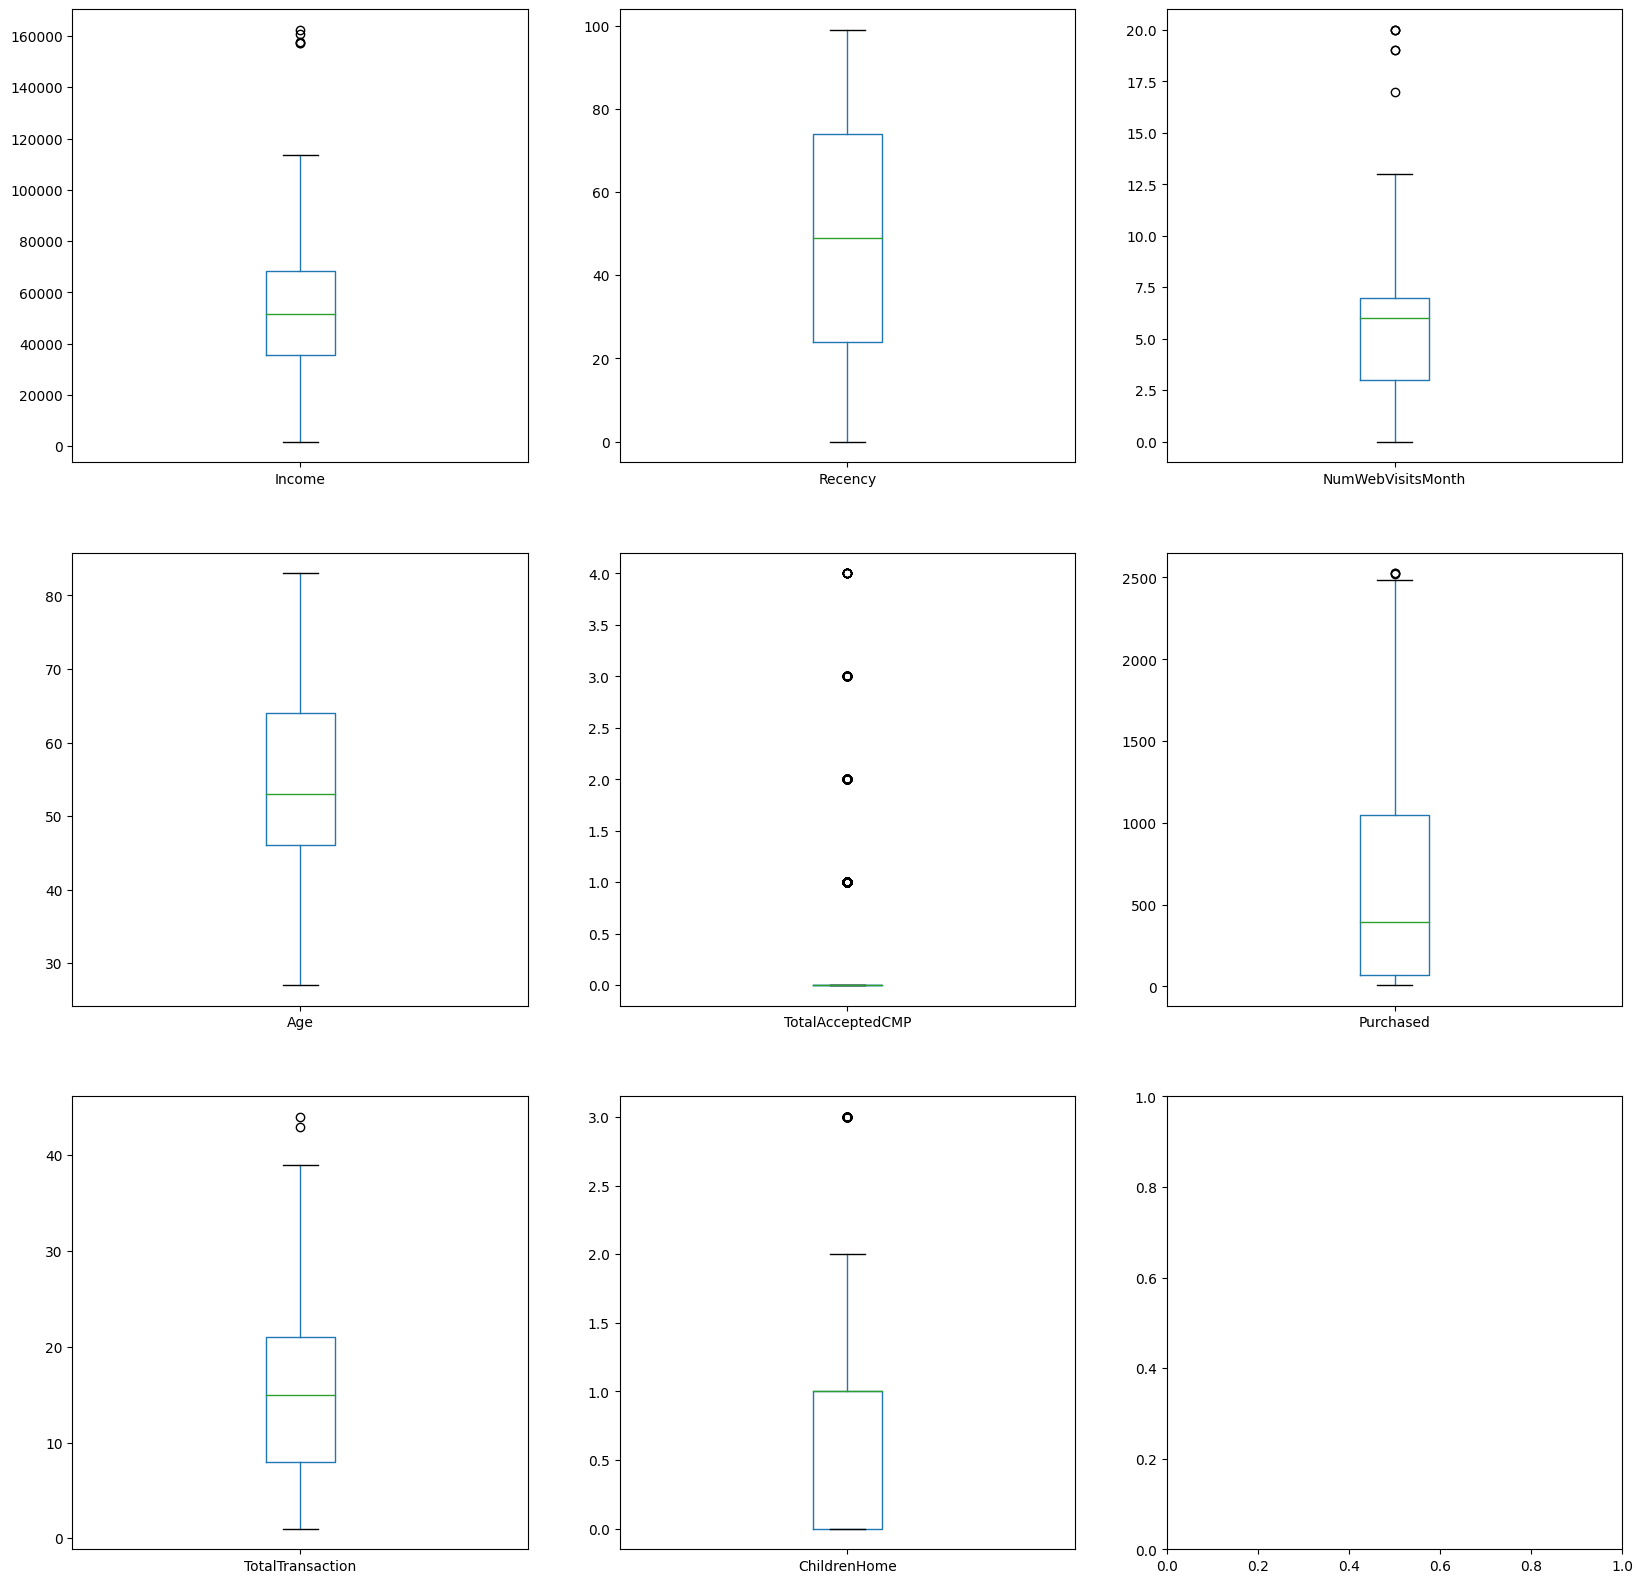

In [ ]:
num_column = ['Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'TotalAcceptedCMP','Purchased','TotalTransaction','ChildrenHome']

fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
for a, el in enumerate(num_column):
    i = df_copy.boxplot(el, ax=axes.flatten()[a], grid=False)
plt.show()

## Outliers (Pencilan)
1. Terdapat beberapa outlier pada Income, tetapi itu merupakan nilai dari income customer yang memiliki kelas upper-middle hingga high income
2. Recency dan Age tidak memiliki outlier.
3. Asumsikan bahwa NumWebVisitsMonth berisikan nilai customer mengunjungi website bukanlah outlier tetapi extreme values. Extreme values sendiri dapat menjadi data yang penting. 
4. Nilai yang teretera pada TotalAcceptedCmp, Purchased, TotalTransaction adalah nilai yang bergantung kepada kemampuan customer untuk membeli barang. 
5. Jumlah anak bergantung kepada setiap customer.

# Data Clean
  

## Dataset awal (sebelum cleaning):

In [ ]:
df.head()  #menampilkan dataset awal

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data1 = df.shape
print(f'Dataset lama memiliki jumlah baris, kolom: {data1}')

Dataset lama memiliki jumlah baris, kolom: (2240, 29)


Data diatas merupakan dataset lama yang belum dibersihkan, memiliki 2240 baris dan 29 kolom.

Data dibawah merupakan dataset baru yang telah dibersihkan, dengan jumlah baris 2232 dan 17 kolom.

Missing values hanya terjadi pada kolom Income, dan telah diisi dengan median kolom itu sendiri. 
Serta pembuatan bin untuk mempermudah analisis apabila diperlukannya suatu kelompok di dalam data tersebut.

## Dataset akhir (setelah cleaning)

In [ ]:
data2 = df_copy.shape
print(f'Dataset yang telah dibersihkan memiliki jumlah baris, kolom: {data2}')

Dataset yang telah dibersihkan memiliki jumlah baris, kolom: (2232, 17)


In [ ]:
#Preparing to copy a clean data
df_clean = df_copy.copy()
df_clean.head(10) #menampilkan data clean 10 teratas

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Response,Income_Class,TotalAcceptedCMP,Purchased,TotalTransaction,ChildrenHome,Age,Class_Recency,Intensity_Web,Class_Expense,Group_Age
0,5524,Graduate,Single,58138.0,58,7,1,Lower_Middle,0,1617,25,0,66,HighIntensity,Often_Enough,Middle_Spent,Senior
1,2174,Graduate,Single,46344.0,38,5,0,Low,0,27,6,2,69,HighIntensity,Often_Enough,Low_Spent,Senior
2,4141,Graduate,Relationship,71613.0,26,4,0,Lower_Middle,0,776,21,0,58,HighIntensity,Sometimes,Low_Spent,Old
3,6182,Graduate,Relationship,26646.0,26,6,0,Low,0,53,8,1,39,HighIntensity,Often_Enough,Low_Spent,Adult
4,5324,Graduate,Relationship,58293.0,94,5,0,Lower_Middle,0,422,19,1,42,LowIntensity,Often_Enough,Low_Spent,Old
5,7446,Graduate,Relationship,62513.0,16,6,0,Lower_Middle,0,716,22,1,56,HighIntensity,Often_Enough,Low_Spent,Old
6,965,Graduate,Single,55635.0,34,6,0,Lower_Middle,0,590,21,1,52,HighIntensity,Often_Enough,Low_Spent,Old
7,6177,Graduate,Relationship,33454.0,32,8,0,Low,0,169,10,1,38,HighIntensity,Often_Enough,Low_Spent,Adult
8,4855,Graduate,Relationship,30351.0,19,9,1,Low,0,46,6,1,49,HighIntensity,Often_Enough,Low_Spent,Old
9,5899,Graduate,Relationship,5648.0,68,20,0,Low,1,49,2,2,73,LowIntensity,Often,Low_Spent,Senior


# Data Analysis

## Analisis Deskriptif Statistik 

In [ ]:
#Describe the categorical dataset
categoric_column = ['Education','Marital_Status', 'Income_Class', 'Class_Recency', 'Intensity_Web', 'Class_Expense', 'Group_Age','Response']
df_clean[categoric_column].describe()


,Education,Marital_Status,Income_Class,Class_Recency,Intensity_Web,Class_Expense,Group_Age,Response
count,2232,2232,2232,2232,2232,2232,2232,2232
unique,2,2,4,3,4,3,3,2
top,Graduate,Relationship,Lower_Middle,HighIntensity,Often_Enough,Low_Spent,Old,0
freq,2178,1441,1165,1351,1441,1631,1191,1898


### Penjelasan Statistik Deskriptif berdasarkan Data Kategorikal:


**1. Education:**
- User memiliki 2 kategori dalam Education.
- Jumlah user yang masuk ke dalam kategori Graduate adalah 2178 dari 2232 user.

**2. Marital_Status:**
- User memiliki 2 kategori dalam Marital Status.
- Jumlah user yang masuk ke dalam kategori Relationship adalah 1441 dari 2232 user.

**3. Income_Class:**
- User memiliki 4 kategori dalam Income Class.
- Jumlah user yang masuk ke dalam kategori Lower Middle (>50,000 - 100,000) adalah 1165 dari 2232 user.

**4. Class_Recency:**
- User memiliki 3 kategori dalam Class Recency.
- Jumlah user yang masuk ke dalam kategori High Intensity adalah 1351 dari 2232 user.

**5. Intensity_Web:**
- User memiliki 4 kategori dalam Intensity Web.
- Jumlah user yang masuk ke dalam kategori Often Enough adalah 1441 dari 2232 user.

**6. Class_Expense:**
- User memiliki 3 kategori dalam Class Expense.
- Jumlah user yang masuk ke dalam kategori Low Spent adalah 1631 dari 2232 user.

**7. Group_Age:**
- User memiliki 3 kategori dalam Group Age.
- Jumlah user yang masuk ke dalam kategori Old (41-59 tahun) adalah 1191 dari 2232 user.

**8. Response:**
- User memiliki 2 kategori dalam Response.
- Jumlah user yang masuk ke dalam kategori tidak memberikan response (0/tidak) adalah 1898 dari 2232 user.


In [ ]:
#Describe numerical column
pd.set_option('display.float_format',lambda x: '%.4f' %x)
numeric_column = ['Income','Recency','NumWebVisitsMonth','Response','Age','TotalAcceptedCMP','Purchased','TotalTransaction','ChildrenHome']
desc_clean = df_clean[numeric_column].describe()
desc_clean.loc['kurtosis'] = df_clean[numeric_column].kurt()
desc_clean.loc['skewness'] = df_clean[numeric_column].skew()
desc_clean.loc['variance'] = df_clean[numeric_column].var()
desc_clean.round(2)

C:\Users\USER\AppData\Local\Temp\ipykernel_41288\2368111758.py:7: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  desc_clean.loc['variance'] = df_clean[numeric_column].var()


,Income,Recency,NumWebVisitsMonth,Age,TotalAcceptedCMP,Purchased,TotalTransaction,ChildrenHome
count,2232.0000,2232.0000,2232.0000,2232.0000,2232.0000,2232.0000,2232.0000,2232.0000
mean,51902.7000,49.1000,5.3200,54.1000,0.3000,607.0600,14.9000,0.9500
std,21157.1400,28.9600,2.4100,11.7000,0.6800,601.8700,7.6600,0.7500
min,1730.0000,0.0000,0.0000,27.0000,0.0000,8.0000,1.0000,0.0000
25%,35538.7500,24.0000,3.0000,46.0000,0.0000,69.0000,8.0000,0.0000
50%,51381.5000,49.0000,6.0000,53.0000,0.0000,397.0000,15.0000,1.0000
75%,68179.5000,74.0000,7.0000,64.0000,0.0000,1047.2500,21.0000,1.0000
max,162397.0000,99.0000,20.0000,83.0000,4.0000,2525.0000,44.0000,3.0000
kurtosis,0.4100,-1.2000,1.8000,-0.8000,7.9700,-0.3400,-0.9000,-0.2500
skewness,0.2800,-0.0000,0.1800,0.0900,2.7200,0.8600,0.2600,0.4100


### Penjelasan Statistik Deskriptif berdasarkan Data Numerik:


**1. Income:**
- Rata-rata dari **Income** adalah 51,902.7 dengan nilai minimum 1,730 dan nilai maximum 162,937.
- Nilai skewness 0.23 yang berarti data memiliki kurva fairly symmetrical.
- Nilai kurtosis 0.4 mendeskripsikan data memiliki bentuk kurva platy kurtosis (flat)

**2. Recency:**
- Rata-rata dari **Recency** adalah 49.1 dengan nilai minimum 0 dan nilai maximum 99.
- Nilai skewness 0 yang berarti data memiliki kurva simetris.
- Nilai kurtosis -1.2 mendeskripsikan data memiliki bentuk kurva platy kurtosis (flat)

**3. NumWebVisitsMonth:**
- Rata-rata dari **NumWebVisitsMonth** adalah 5.32 dengan nilai minimum 0 dan nilai maximum 20.
- Nilai skewness 0.18 yang berarti data memiliki kurva fairly symmetrical.
- Nilai kurtosis 1.8 mendeskripsikan data memiliki bentuk kurva platy kurtosis (flat)

**4. Age:**
- Rata-rata dari **Age** adalah 54.1 dengan nilai minimum 27 dan nilai maximum 83.
- Nilai skewness 0.09 yang berarti data memiliki kurva fairly symmetrical.
- Nilai kurtosis -0.8 mendeskripsikan data memiliki bentuk kurva platy kurtosis (flat)

**5. TotalAcceptedCMP:**
- Rata-rata dari **TotalAcceptedCMP** adalah 0.3 dengan nilai minimum 0 dan nilai maximum 4.
- Nilai skewness 2.72 yang berarti data memiliki kurva highly skewed.
- Nilai kurtosis 7.97 mendeskripsikan data memiliki bentuk kurva lepto kurtosis.

**6. Purchased:**
- Rata-rata dari **Purchased** adalah 607.0 dengan nilai minimum 9 dan nilai maximum 2525.
- Nilai skewness 0.86 yang berarti data memiliki kurva fairly symmetrical.
- Nilai kurtosis -0.34 mendeskripsikan data memiliki bentuk kurva platy kurtosis (flat)

**7. TotalTransaction:**
- Rata-rata dari **Purchased** adalah 14.9 dengan nilai minimum 1 dan nilai maximum 44.
- Nilai skewness 0.26 yang berarti data memiliki kurva fairly symmetrical.
- Nilai kurtosis -0.9 mendeskripsikan data memiliki bentuk kurva platy kurtosis (flat)

**8. ChildrenHome:**
- Rata-rata dari **ChildrenHome** adalah 0.95 dengan nilai minimum 0 dan nilai maximum 3.
- Nilai skewness 0.4 yang berarti data memiliki kurva fairly symmetrical.
- Nilai kurtosis -0.25 mendeskripsikan data memiliki bentuk kurva platy kurtosis (flat)

## Data Overview:
- There are 2232 users in clean dataset
- Median of income is **51381.5** with median of age is **53** years old
- Most of the customers have been in relationship and graduated people
- Maximum Child of Customers is 3, with most of users have 1 child.

# Bivariate Analaysis

## 1. Income dengan Education

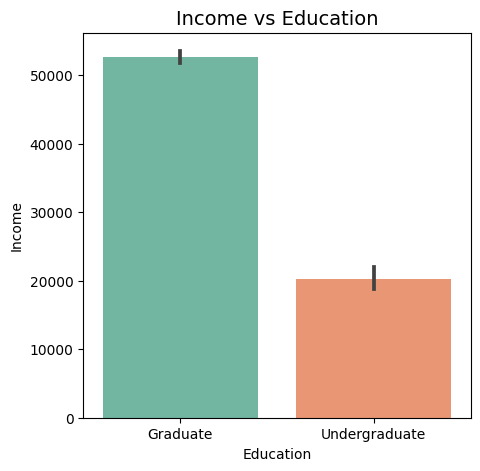

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Income vs Education',fontsize=14)
ax = sns.barplot(x='Education', y='Income', data=df_clean, palette='Set2')

Income vs Education
Berdasarkan Bar di atas, customer yang memiliki jenjang pendidikan "Graduate" memiliki income lebih besar dibandingkan dengan customer yang saat ini menduduki jenjang pendidikan "Undergraduate".  

Melihat persebaran data berdasarkan kelas income terhadap daya beli seorang customer

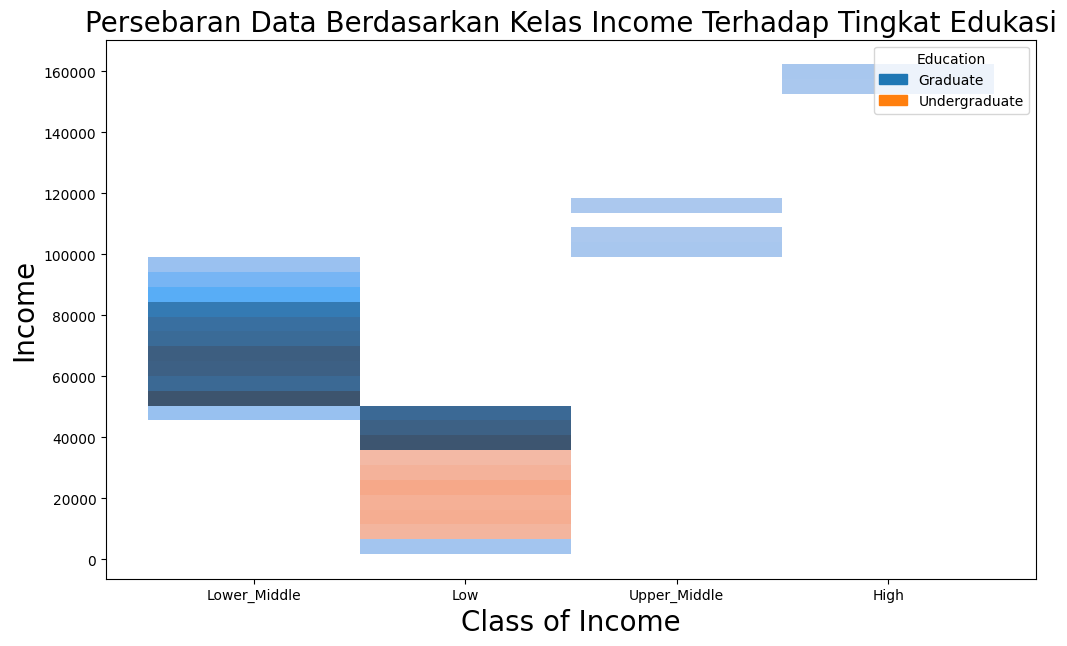

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(data=df_clean, x='Income_Class', y= 'Income', hue='Education', multiple='stack', )
plt.title('Persebaran Data Berdasarkan Kelas Income Terhadap Tingkat Edukasi', fontsize=20)
plt.xlabel('Class of Income', fontsize=20)
plt.ylabel('Income', fontsize=20);

Income vs Income Class by Education
* Berdasarkan income, dikelompokkan kembali menjadi kelas income, dan dikelompokkan berdasarkan tingkat edukasi customer
* Persebaran data berdasarkan tingkat pendidikan terlihat bahwa "Graduate" menduduki kelompok terbesar pada kelas income "Lower_Middle"
* Seluruh kelompok income "High" dan "Upper_Middle" memiliki tingkat pendidikan "Graduate"
* Tingkat pendidikan customer "Undergraduate" menempati kelas income "Low"

Dari analisis di atas, dapat disimpulkan bahwa customer yang sudah melewati jenjang pendidikan lebih banyak tersebar di kelas income lower middle. 

## 2. Income dengan Marital Status

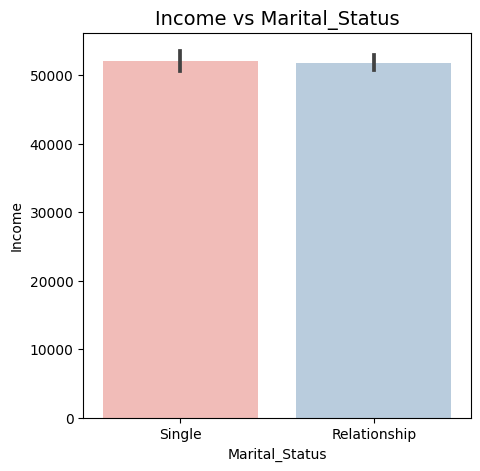

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Income vs Marital_Status',fontsize=14)
ax = sns.barplot(x='Marital_Status', y='Income', data=df_clean, palette='Pastel1')

Berdasarkan barplot di atas, secara rata-rata income terlihat sama. Yang dapat membedakan ialah garis di tengah barplot, yaitu garis standar deviasi.
- Garis stdev di bar 'Single' memiliki ukuran lebih panjang dibandingkan ukuran garis stdev bar 'Relationship'
- Hal tersebut dapat diasumsikan, bahwa rentang simpangan baku 'Single' lebih besar dibandingkan rentang simpangan baku 'Relationship.

Karena berdasarkan barplot belum dapat mengambil banyak insight 'Income vs Marital status' maka, akan dilakukan analisis kembali dengan pengelompokkan kelas Income, dapat dilihat pada plot di bawah ini.

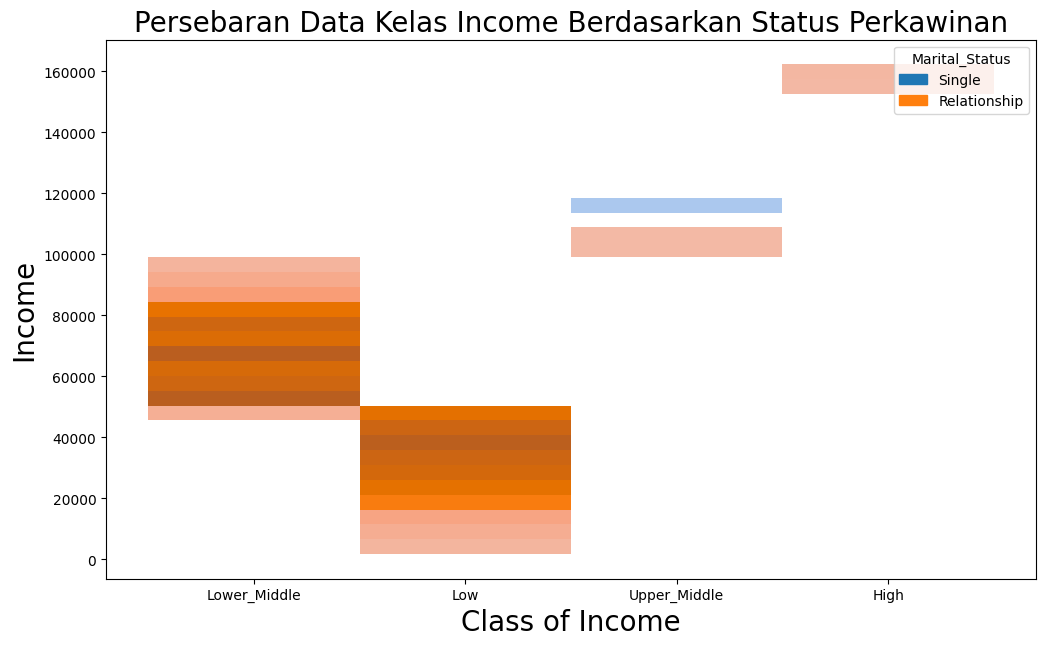

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(data=df_clean, x='Income_Class', y= 'Income', hue='Marital_Status', multiple='stack', )
plt.title('Persebaran Data Kelas Income Berdasarkan Status Perkawinan', fontsize=20)
plt.xlabel('Class of Income', fontsize=20)
plt.ylabel('Income', fontsize=20);

Berdasarkan plot di atas:
- Customer dengan status 'Single' memiliki kelas Income upper middle
- Customer dengan status 'Relationship' tersebar di seluruh kelas income
- Kelas income low dan lower middle terisi oleh customer yang memiliki status 'Relationship'

Hasil dari plot di atas dapt disimpulkan bahwa, customer dengan status Relationship lebih banyak dibandingkan dengan yang single. Maka dari itu persebarannya pun didalam kelas income tidak merata.

## 3. Income dengan Purchased

Persebaran data daya beli customer berdasarkan income

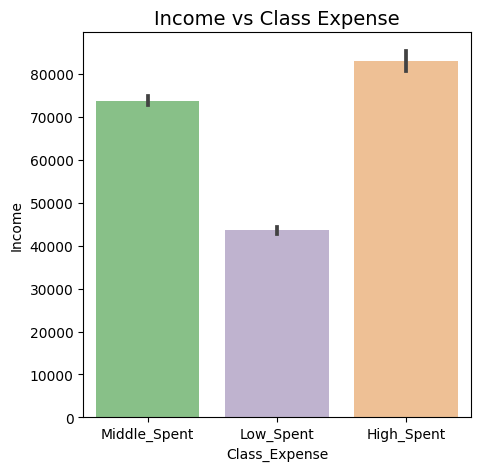

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Income vs Class Expense',fontsize=14)
ax = sns.barplot(x='Class_Expense', y='Income', data=df_clean, palette='Accent')

Dari grafik di atas dapat disimpulkan bahwa: 
- Semakin rendah jumlah income customer, maka semakin rendah juga daya beli customer.
- Pada grafik di atas:
    - High spent menempati titik income tertinggi.
    - Middle spent menempati titik di antara high spent dan low spent.
    - Low spent menempati titik terendah dibandingkan middle spent dan high spent.
    
Maka, daya beli customer berdasarkan diagram batang di atas akan mengikuti pemasukkan atau income setiap customer.

Purchased, Income, Income_class

Persebaran data daya beli customer berdasarkan income masin-masing individu

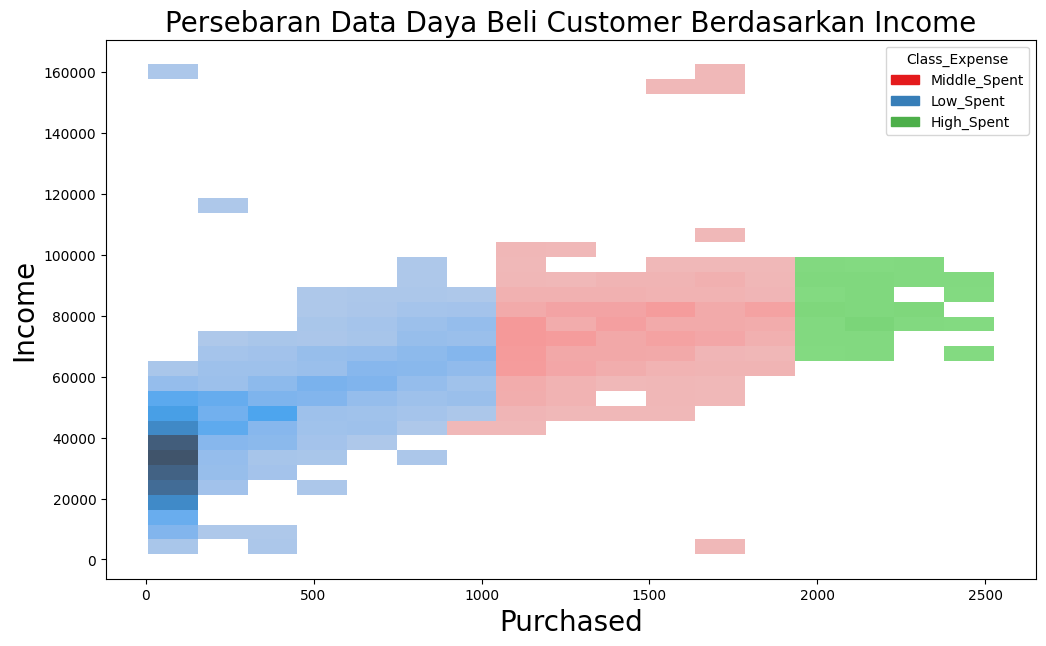

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(data=df_clean, x='Purchased', y= 'Income', hue='Class_Expense', multiple="stack", palette='Set1')
plt.title('Persebaran Data Daya Beli Customer Berdasarkan Income', fontsize=20)
plt.xlabel('Purchased', fontsize=20)
plt.ylabel('Income', fontsize=20);

Berdasarkan grafik yang telah dijelaskan di atas, maka daya beli customer akan bergantung dengan penghasilan customer..
Hal tersebut akan dipetakan kembali dari grafik di atas, dan dilihat persebarannya.
- Terdapat beberapa customer dengan penghasilan tinggi tetapi berasa di kelas low dan middle spent
- Customer dengan kategori high spent memiliki rentang penghasilan 60,000 s/d 100,000 USD.

## 4. Income dengan Recency

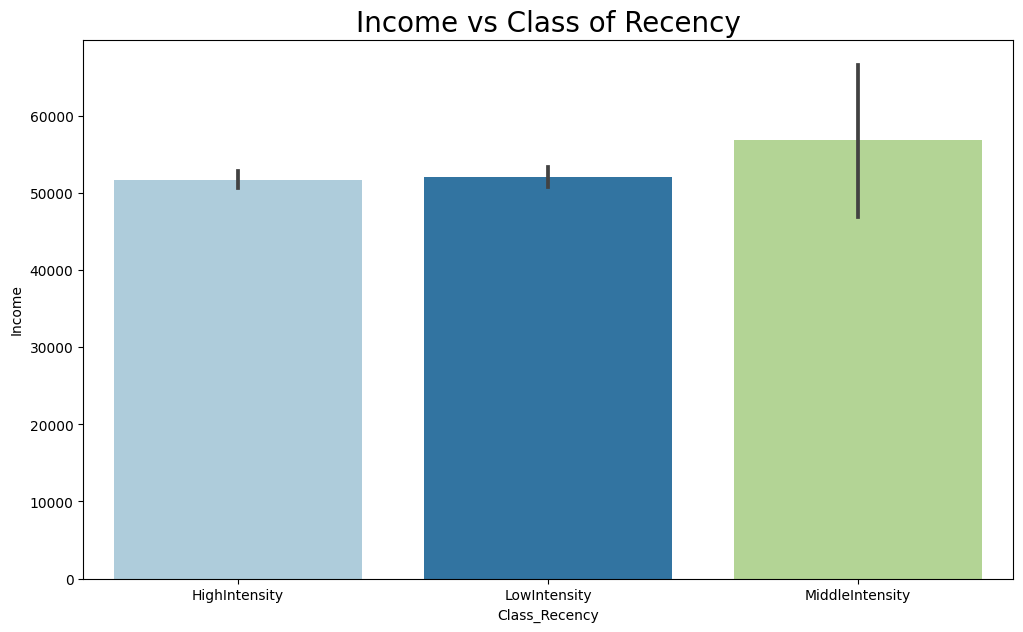

In [ ]:
plt.figure(figsize=(12,7))
plt.title("Income vs Class of Recency",fontsize=20)
ax = sns.barplot(x="Class_Recency", y="Income", data=df_clean, palette='Paired')

Berdasarkan grafik di atas:
- Rata-rata besar pendapatan customer pada recency kelas intensitas menengah terletak pada rentang 50,000 hingga 60,000 USD.
- Sedangkan rerata recency kelas intensitas rendah dan intensitas tinggi memiliki rentang pendapatan yang terlihat sama yaitu 50,000 hingga 55,000 USD

Dapat disimpulkan bahwa pendapatan customer dengan rata-rata rentang 50,000 hingga 60,000 mencakup seluruh kelas recency (intensitas pembelian seorang customer).


Persebaran data berdasarkan income dengan dilihat dari tingkat recency (intensitas belanja) dan dikelompokkan berdasarkan status tiap-tiap customer

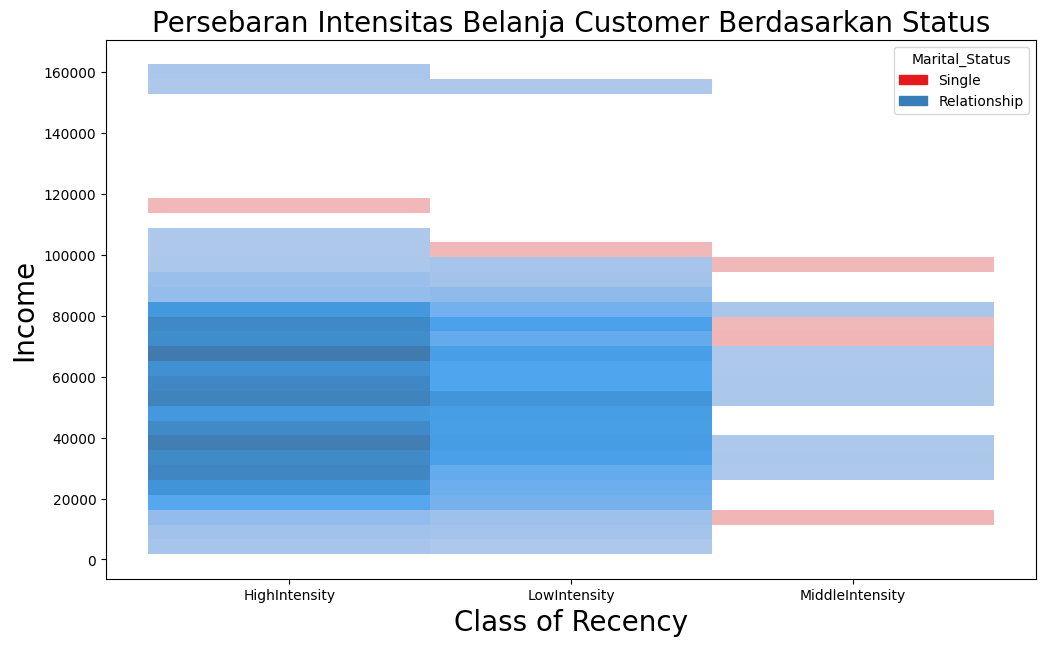

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(data=df_clean, x='Class_Recency', y= 'Income', hue='Marital_Status', multiple="stack", palette='Set1')
plt.title('Persebaran Intensitas Belanja Customer Berdasarkan Status', fontsize=20)
plt.xlabel('Class of Recency', fontsize=20)
plt.ylabel('Income', fontsize=20);

Grafik di atas dapat memberikan informasi:
- Setiap kelas recency memiliki customer dengan status single maupun relationship.
- Pada kelas High Intensity dan Low Intensity didominasi oleh customer yang memiliki status relationship
- Customer dengan status single lebih tersebar pada kelas recency Middle Intensity.
- Customer dengan rentang pendapatan 140,000 s/d 160,000 USD tersebar pada kelas recency High Intensity dan Low Intensity.

Dapat disimpulkan bahwa status single maupun relationship tersebar di seluruh kelas recency (High, Middle, Low Intensity)

## 5. Income dengan Umur

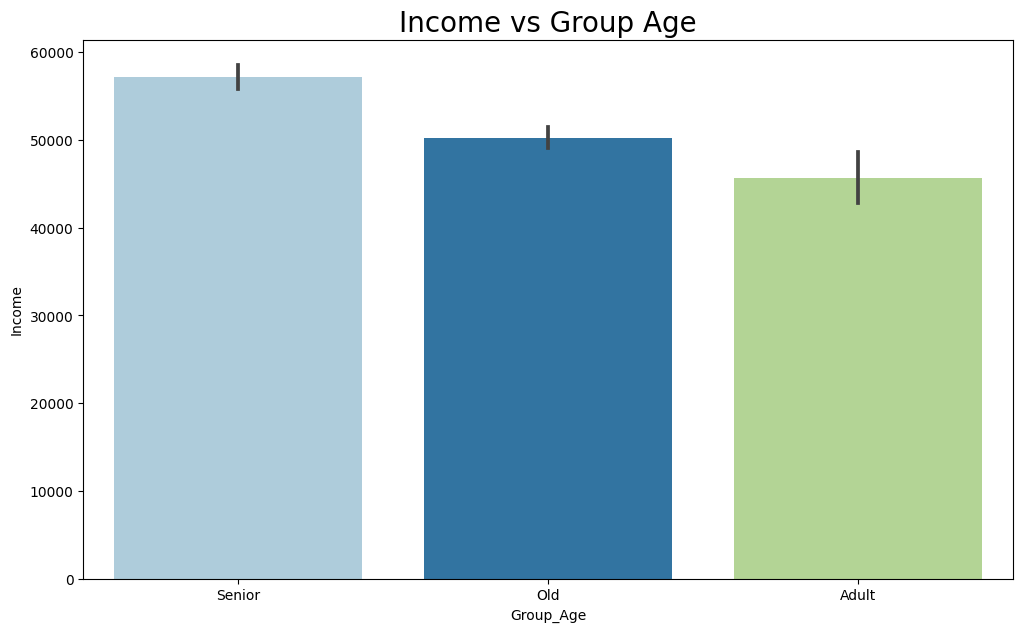

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Income vs Group Age',fontsize=20)
ax = sns.barplot(x="Group_Age", y="Income", data=df_clean, palette='Paired')

Diagram batang di atas menunjukkan:
- Kelompok customer berusia >60 tahun memiliki rata-rata income tertinggi.
- Kelompok customer berusia rentang 41 s/d 60 tahun memiliki rata-rata income di rentang angka 45,000 hingga 50,000 USD.
- Kelompok customer berusia rentang 35 s/d 40 tahun memiliki rerata income pada rentang angka 40,000 hingga 50,000 USD.

Dapat disimpulkan bahwa, rata-rata income kelompok customer tertinggi terdapat pada kelompok usia Senior, dan rata-rata income kelompok customer terendah terdapat pada kelompok usia Adult.

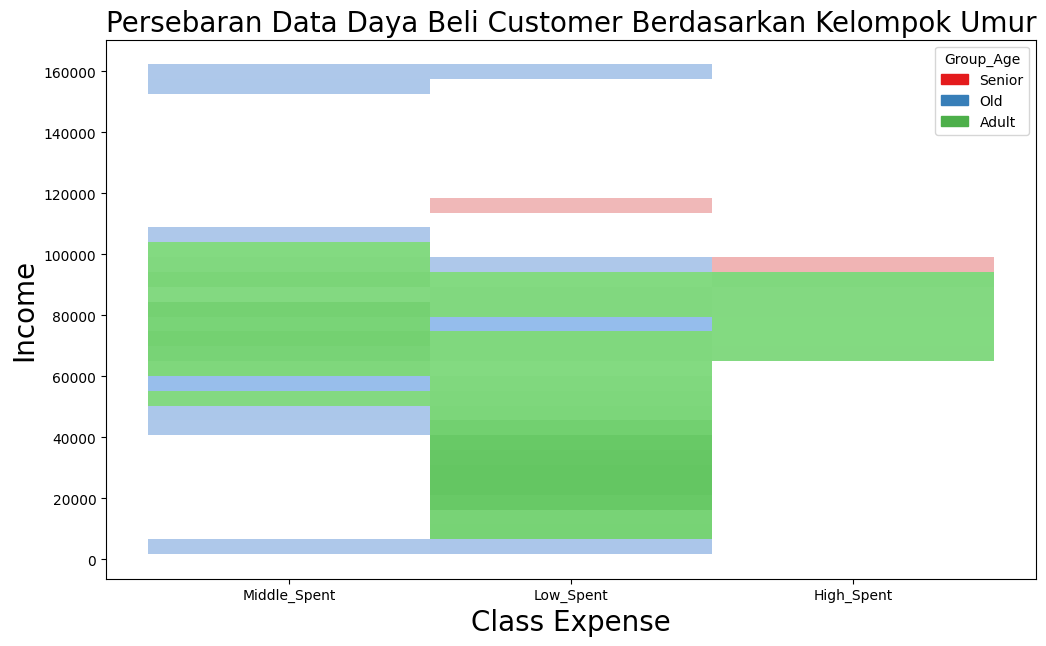

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(data=df_clean, x='Class_Expense', y= 'Income', hue='Group_Age', multiple="stack", palette='Set1')
plt.title('Persebaran Data Daya Beli Customer Berdasarkan Kelompok Umur', fontsize=20)
plt.xlabel('Class Expense', fontsize=20)
plt.ylabel('Income', fontsize=20);

Grafik di atas menunjukkan bahwa:
- Kelompok umur 'Adult' memiliki sebaran di setiap kelompok purchased.
- Dari grafik di atas, kelompok umur 'Old' memiliki income dengan rentang 140,000 hingga 160,000 USD yang terbagi menjadi dua kelas purchased yaitu, Middle Spent dan Low Spent.
- Kelompok umur 'Senior' dengan rentang pendapatan 90,000 hingga 120,000 USD tersebar di dua kelas purchased yaitu, Low Spent dan High Spent.

Kesimpulan yang diperoleh dari grafik di atas ialah, kelompok umur 'Adult' tersebar di seluruh kelas purchased (low, middle, dan high) dengan rentang income 10,000 hingga 110,000 USD.

## 6. Income dengan Children 

Children Home vs Education based on Income

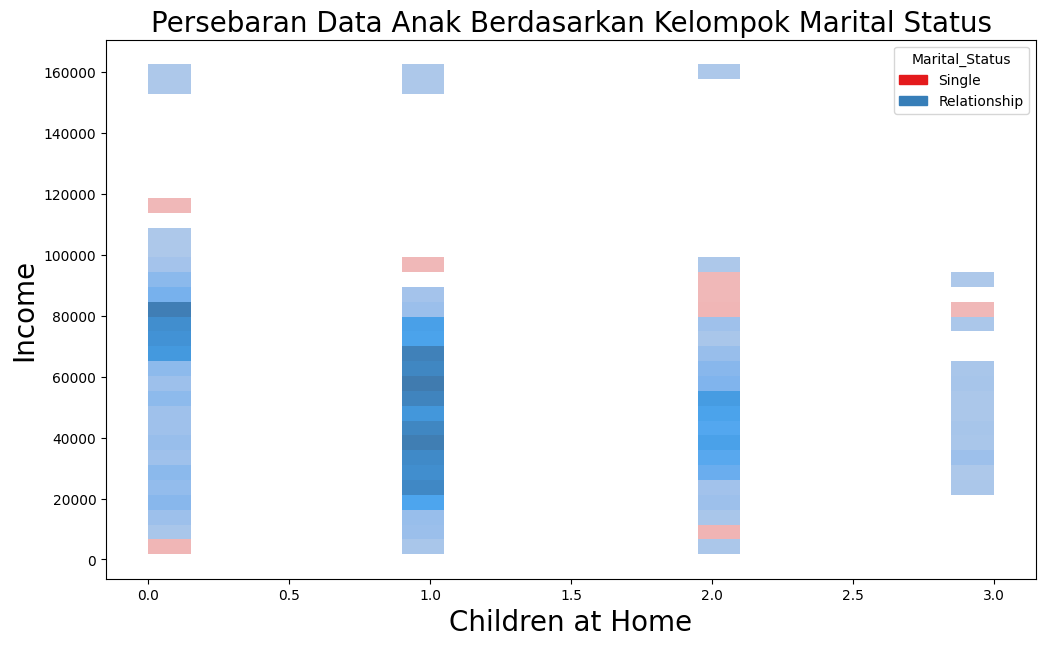

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(data=df_clean, x='ChildrenHome', y= 'Income', hue='Marital_Status', multiple="stack", palette='Set1')
plt.title('Persebaran Data Anak Berdasarkan Kelompok Marital Status', fontsize=20)
plt.xlabel('Children at Home', fontsize=20)
plt.ylabel('Income', fontsize=20);

Berdasarkan grafik di atas maka:
- Status single dan relationship tersebar di seluruh angka jumlah anak di rumah (0-3)
- Jumlah anak tertinggi pada customer adalah 3
- Terdapat pula customer yang tidak memiliki anak

Kesimpulan yang diperoleh ialah, customer dengan status single juga memiliki anak dengan persebaran 1 hingga 3 anak, serta rentang income tersebar dari 1,000 hingga >160,000 USD.

## 7. Income dengan Total Transaction

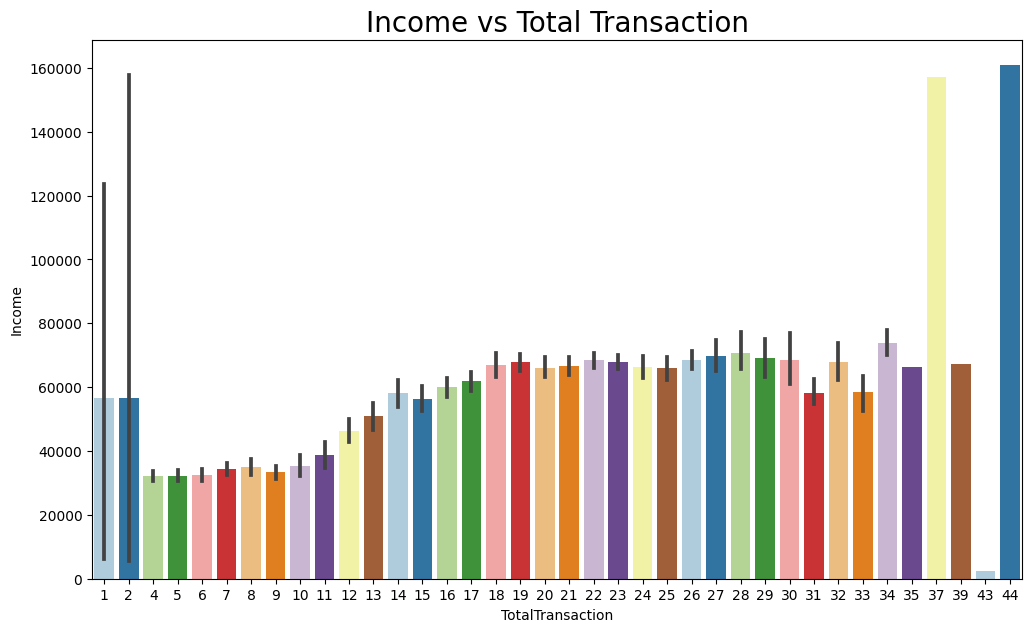

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Income vs Total Transaction',fontsize=20)
ax = sns.barplot(x="TotalTransaction", y="Income", data=df_clean, palette='Paired')

Berdasarkan diagram batang di atas:
- Total transaksi bersifat fluktuatif berdasarkan pendapatan customer.
- Berdasarkan grafik, income >160,000 USD menempati total transaksi sebesar 44.
- Total transaksi terendah berada pada rentang income 20,000 hingga 40,000 USD.
- Rentang income 1,000 hingga 10,000 USD terdapat sekelompok customer yang memiliki total transaksi sebesar 43

Kesimpulan yang dapat diperoleh dari diagram di atas adalah income tidak dapat menjadi tolak ukur seseorang melakukan transaksi.

## 8. Total Transaction dengan Class Expense

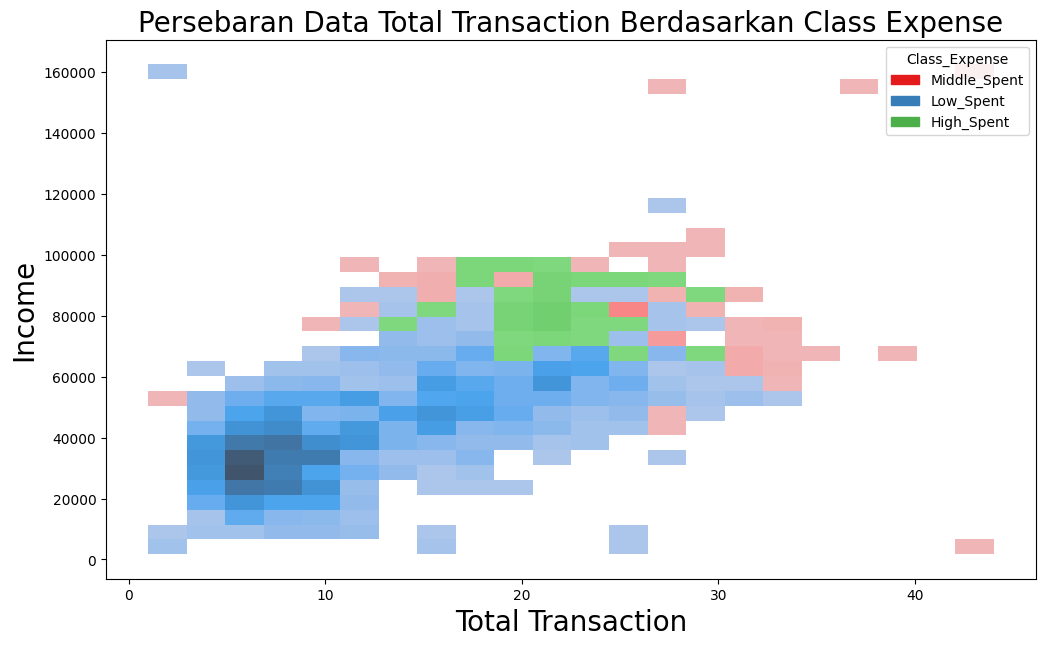

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(data=df_clean, x='TotalTransaction', y= 'Income', hue='Class_Expense', multiple="stack", palette='Set1')
plt.title('Persebaran Data Total Transaction Berdasarkan Class Expense', fontsize=20)
plt.xlabel('Total Transaction', fontsize=20)
plt.ylabel('Income', fontsize=20);

Berdasarkan data di atas:
- Kelompok high spent memiliki rentang transaksi 10 hingga 30.
- Kelompok middle spent tersebar pada rentang total transaksi >0 hingga >40.
- kelompok low spent tersebar pada rentang total transaksi >0 hingga <40.

Dari data di atas dapat disimpulkan bahwa, rerata rentang income class expense terhadap total transaksi berada di 1,000 hingga 120,000 USD. 

Total Income >140,000 USD memiliki kelas middle spent dan low spent. 

## 9. Income dengan Intensitas Web

Income vs NumWebVisitsMonth

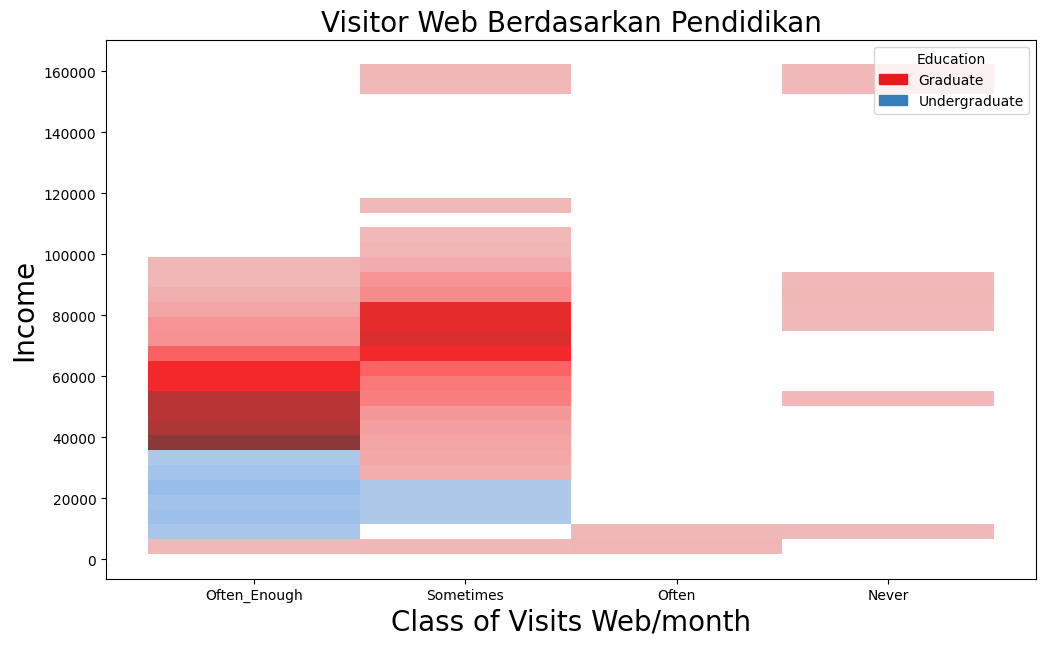

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(data=df_clean, x='Intensity_Web', y= 'Income', hue='Education', multiple="stack", palette='Set1')
plt.title('Visitor Web Berdasarkan Pendidikan', fontsize=20)
plt.xlabel('Class of Visits Web/month', fontsize=20)
plt.ylabel('Income', fontsize=20);

Grafik di atas dapat menjelaskan bahwa:
- Tersebarnya tingkat pendidikan dengan intensitas membuka website store.
- Data tertinggi terdapat pada kategori 'Sometimes' pada intensitas kunjungan website.

Dari data di atas, dapat disimpulkan bahwa, masih terdapat customer yang tidak pernah mengunjungi website store, dan untuk kunjungan yang terbilang sering (often) masih tergolong rendah.

## 10. Income dengan Response

Income vs Response dikelompokkan berdasarkan kelas umur

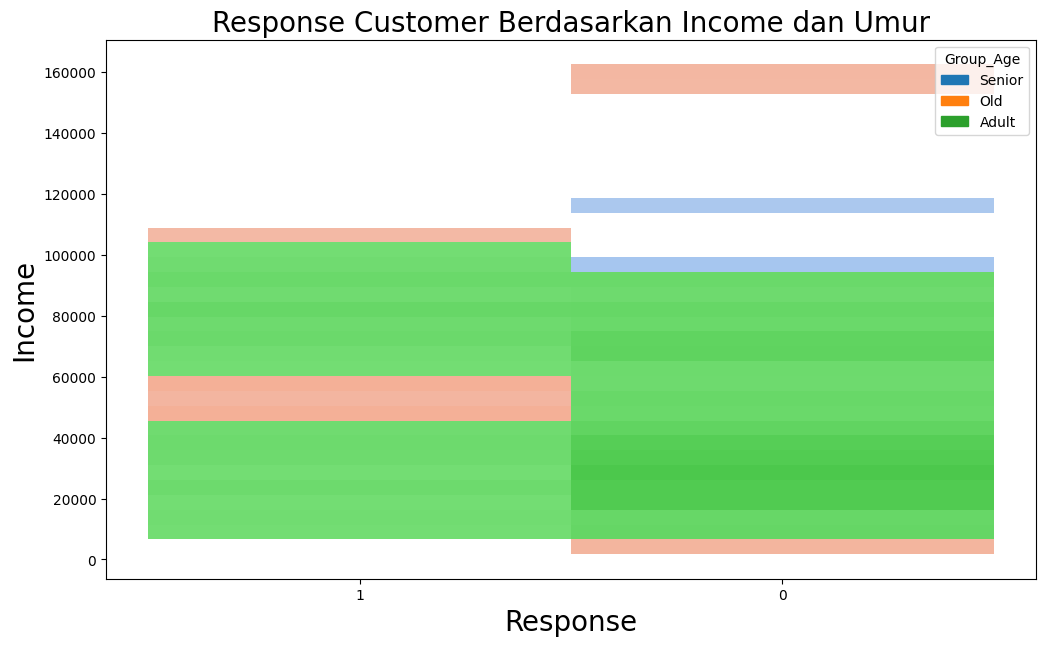

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(data=df_clean, x='Response', y= 'Income', hue='Group_Age', multiple="stack", palette='tab10')
plt.title('Response Customer Berdasarkan Income dan Umur', fontsize=20)
plt.xlabel('Response', fontsize=20)
plt.ylabel('Income', fontsize=20);

Perlu diketahui bahwa:
- Response dengan nilai '1' = Ya
- Response dengan nilai '0' = Tidak

Dapat disimpulkan berdasarkan data di atas, bahwa hanya group Adult dan Old yang memberikan response terhadap campaign yang diadakan oleh store.

Berdasarkan data di atas, kelompok Senior sama sekali tidak memberikan respon terhdap campaign yang diselenggarakan oleh store. 

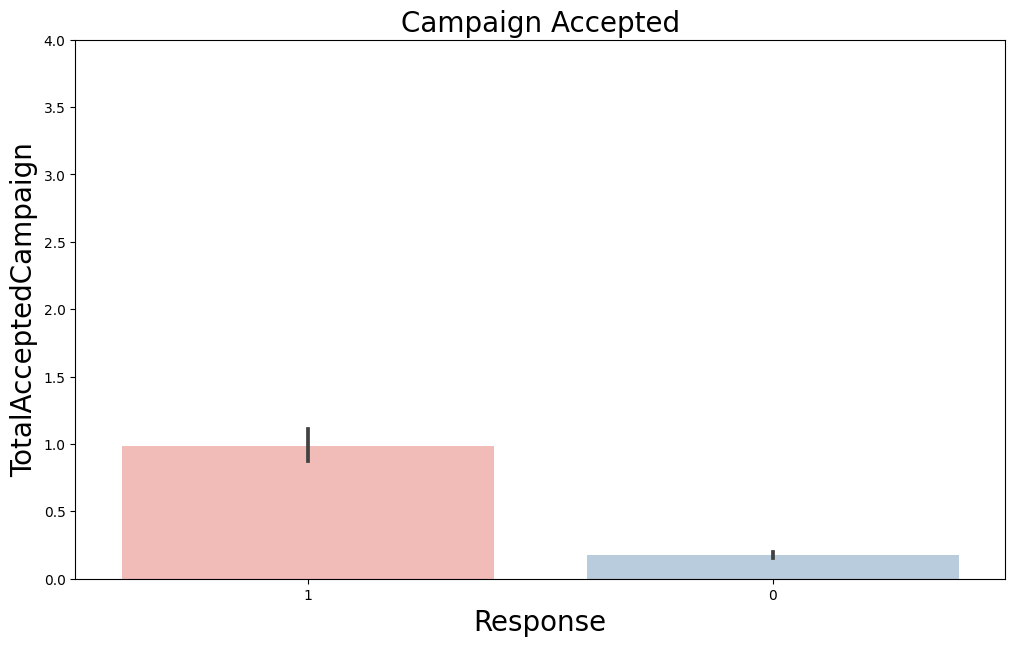

In [ ]:
plt.figure(figsize = (12,7))
sns.barplot(data=df_clean, x='Response', y= 'TotalAcceptedCMP', palette='Pastel1')
plt.ylim(0,4)
plt.title('Campaign Accepted', fontsize=20)
plt.xlabel('Response', fontsize=20)
plt.ylabel('TotalAcceptedCampaign', fontsize=20);

Diagram batang di atas menunjukkan bahwa rerata campaign yang direspon oleh customer adalah 1.
Hal tersebut dikarenakan setiap customer diberikan kesempatan hingga campaign ke-5 untuk mengikuti campaign tersebut.
Serta, terlihat bahwa lebih banyak customer yang merespon campaign dibandingkan dengan customer yang tidak merespon campaign yang diselenggarakan oleh store.

# Kesimpulan

Dataset yang digunakan mayoritas memiliki **Graduate Education**, **Relationship Marital Status**, **Lower Middle Income Class**, **High Intensity Recency**, **Often Enough Web Intensisty**, **Low Spend Class Expense**, **Old (41-59) Age Group** dan **0 Feedback Response**. Hasil analisis bivariate variabel independen income menunjukkan, income tertinggi terdapat pada kategori **Education** adalah **Graduate**, **Marital Status** adalah **Single**, **Purchased** status adalah **High Spent**, **Recency** adalah **Middle Intensity**, **Umur** adalah **Senior (>60)**, **Children** adalah **3**, **Total Transaction** adalah **44**, **Class Expense** adalah **Middle Spent**, **Intensitas Web** adalah **Sometimes**, dan **Response** adalah **1**.

# Saran

Hasil Analisis menunjukkan mayoritas customer merupkan Lower Middle (50-100k) Income Class, Old Age group, Often Enough Web intensity, dan Low Spend Class Expense. 
- Campaign untuk kelompok Lower Middle dapat berupa blasting e-mail maupun text message (sms) berupa promosi free product for 100 people, dengan terms and conditions berlaku. T&C tersebut dapat berupa minimum purchase, maupun hanya dengan pembelian sebuah produk yang memang sedang dibutuhkan promosi juga.
- Campaign untuk kelompok dengan Old Age group dapat berupa penjualan bundling produk-produk kesehatan seperti Bundling produk kesehatan jantung atau yang lainnya.
- Campaign untuk kelompok dengan Often Enough Web intensity dapat berupa pop-up iklan yang ada muncul website store ataupun push notification terkait promo yang ada melalui email/akun customer.
- Campaign untuk kelompok Low Spend group dapat berupa penawaran produk-produk dengan harga spesial dengan penempatan informasi promo tersebut di daerah kasir, agar dapat terlihat saat customer tersebut sudah akan melakukan pembayaran.

# Export clean dataset (.csv) to work in Tableau 

In [ ]:
df_clean.to_csv('marketing_campaign_clean.csv', index=False)